<font size = '6'><b>Linear Time-Invariant (LTI) Systems</b></font>

<table style="border-style: hidden; border-collapse: collapse;" width = "96%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 70% style="border-style: hidden; border-collapse: collapse;">
             
        </td>
        <td width = 16%>
            Prof. Seungchul Lee
                    
            [http://isystems.unist.ac.kr/](http://isystems.unist.ac.kr/)
            UNIST
        </td>
    </tr>
</table>


Table of Contents
<div id="toc"></div>

# 1. Convolution

## 1.1. Supperposition

Break input into additive parts and sum the responses to the parts

\begin{align}
x[n]=\{3,11,7,&\;0,-1,4,2\}\quad \quad -3\leq n \leq 3\\
&\uparrow
\end{align}

\begin{align}
h[n]=\{2,&\;3,0,-5,2,1\}\quad \quad -1\leq n \leq 4\\
&\uparrow
\end{align}

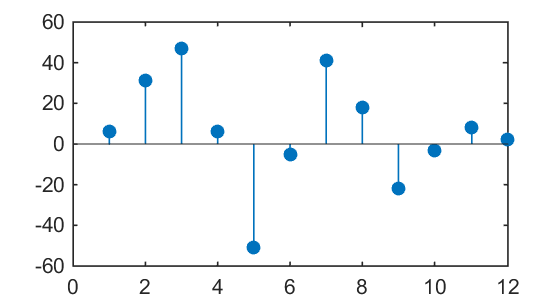

y =

     6    31    47     6   -51    -5    41    18   -22    -3     8     2

In [4]:
%plot -s 560,300
% matlab command 'conv'
x = [3,11,7,0,-1,4,2]; 
h = [2,3,0,-5,2,1];    
y = conv(x,h)
stem(y,'filled'), ylim([-60 60])
% this is not correct

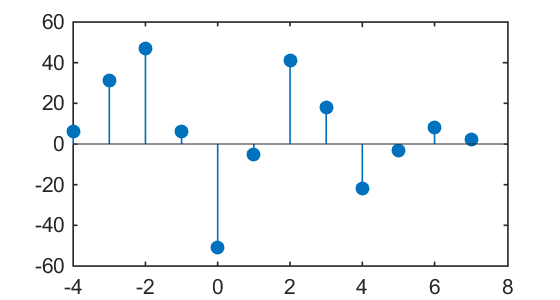

In [5]:
%plot -s 560,300
x = [3,11,7,0,-1,4,2];  nx = [-3: 3];
h = [2,3,0,-5,2,1];     nh = [-1: 4];
[y,ny] = conv_m(x,nx,h,nh);

stem(ny,y,'filled'), ylim([-60 60])
% this is what we want

```octave
function [y,ny] = conv_m(x,nx,h,nh)

% Modified convolution routine for signal processing
% [y,ny] = conv_m(x,nx,h,nh)
%  y = convolution result
% ny = support of y
%  x = first signal on support nx
% nx = support of x
%  h = second signal on support nh
% nh = support of h

nyb = nx(1)+nh(1); 
nye = nx(length(x)) + nh(length(h));
ny = [nyb:nye];
y = conv(x,h);                                            
```

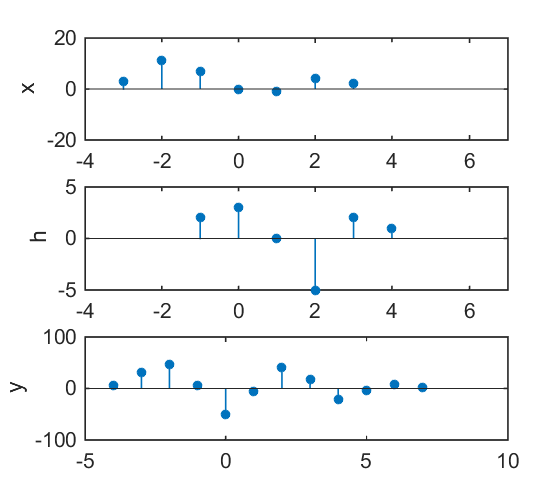

In [8]:
%plot -s 560,500
subplot(3,1,1), stem(nx,x,'filled','markersize',4); xlim([ny(1),ny(end)]);  ylabel('x')
subplot(3,1,2), stem(nh,h,'filled','markersize',4); xlim([ny(1),ny(end)]);  ylabel('h')
subplot(3,1,3), stem(ny,y,'filled','markersize',4); ylabel('y')

## 1.2. Circular convolution

In [9]:
x1 = [1,2,2]; x2 = [1,2,3,4];

y = circonvt(x1,x2,4)

% 5-point circular convolution
y = circonvt(x1,x2,5)

% 6-point circular convolution
y = circonvt(x1,x2,6)

y =

    15    12     9    14


y =

     9     4     9    14    14


y =

     1     4     9    14    14     8

```octave
function y = circonvt(x1,x2,N)

% N-point circular convolution between x1 and x2: (time-domain)

% [y] = circonvt(x1,x2,N)
%  y = output sequence containing the circular convolution
% x1 = input sequence of length N1 <= N
% x2 = input sequence of length N2 <= N
%  N = size of circular buffer
%  Method: y(n) = sum (x1(m)*x2((n-m) mod N))

% Check for length of x1
if length(x1) > N
        error('N must be >= the length of x1')
end

% Check for length of x2
if length(x2) > N
        error('N must be >= the length of x2')
end

x1=[x1 zeros(1,N-length(x1))];
x2=[x2 zeros(1,N-length(x2))];

m = [0:1:N-1];
x2 = x2(mod(-m,N)+1);
H = zeros(N,N);

for n = 1:1:N
	H(n,:) = cirshftt(x2,n-1,N);
end

y = x1*H';
```

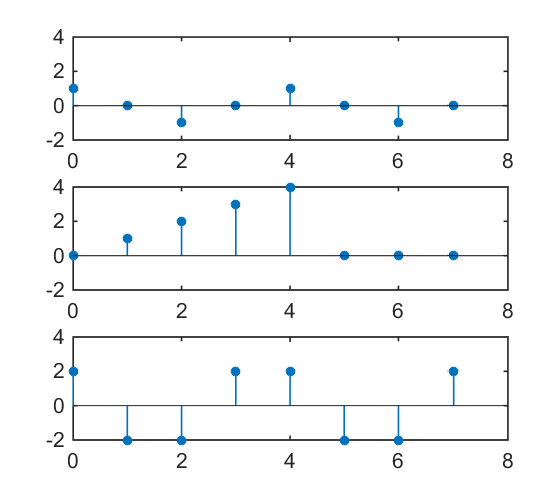

y =

     2    -2    -2     2     2    -2    -2     2

In [11]:
%plot -s 560,500
N = 8;
xn = 0:N-1;
x = [1 0 -1 0 1 0 -1 0];
h = [0 1 2 3 4 0 0 0];
y = circonvt(x,h,N)

subplot(3,1,1), stem(xn,x,'filled','markersize',4), ylim([-2 4])
subplot(3,1,2), stem(xn,h,'filled','markersize',4), ylim([-2 4])
subplot(3,1,3), stem(xn,y,'filled','markersize',4), ylim([-2 4])

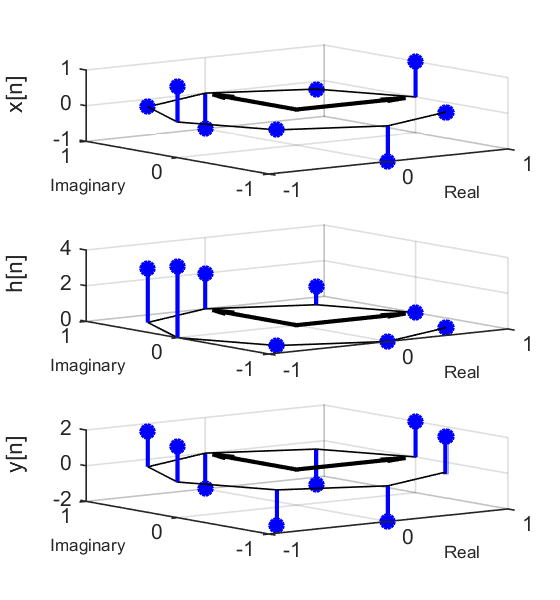

In [13]:
%plot -s 560,600
N = 8;
theta2 = (0:1/N:1)*2*pi;
theta = theta2(1:end-1);

re = cos(theta);
im = sin(theta);

subplot(3,1,1),  stem3(re,im,x,'filled','b','linewidth',2);   hold on;
plot(re,im,'k')
quiver(0,0,1,0,'k','linewidth',2,'maxheadsize',0.5)
quiver(0,0,0,1,'k','linewidth',2,'maxheadsize',0.5), hold off
xlabel('Real','fontsize',8), ylabel('Imaginary','fontsize',8), zlabel('x[n]')

subplot(3,1,2),  stem3(re,im,h,'filled','b','linewidth',2);   hold on;
plot(re,im,'k')
quiver(0,0,1,0,'k','linewidth',2,'maxheadsize',0.5)
quiver(0,0,0,1,'k','linewidth',2,'maxheadsize',0.5), hold off
xlabel('Real','fontsize',8), ylabel('Imaginary','fontsize',8), zlabel('h[n]')

subplot(3,1,3),  stem3(re,im,y,'filled','b','linewidth',2);   hold on;
plot(re,im,'k')
quiver(0,0,1,0,'k','linewidth',2,'maxheadsize',0.5)
quiver(0,0,0,1,'k','linewidth',2,'maxheadsize',0.5), hold off
xlabel('Real','fontsize',8), ylabel('Imaginary','fontsize',8), zlabel('y[n]')


## 1.3. toeplitz matrix

In [7]:
% x(n)=[3,11,7,0,-1,4,2]; 
% h(n)=[2,3,0,-5,2,1]; 
% y(n)=conv_tp(x,h)

x = [3, 11, 7, 0, -1, 4, 2]';
h = [2, 3, 0, -5, 2, 1]';

[y,H] = conv_tp(h,x)

y =

     6
    31
    47
     6
   -51
    -5
    41
    18
   -22
    -3
     8
     2


H =

     2     0     0     0     0     0     0
     3     2     0     0     0     0     0
     0     3     2     0     0     0     0
    -5     0     3     2     0     0     0
     2    -5     0     3     2     0     0
     1     2    -5     0     3     2     0
     0     1     2    -5     0     3     2
     0     0     1     2    -5     0     3
     0     0     0     1     2    -5     0
     0     0     0     0     1     2    -5
     0     0     0     0     0     1     2
     0     0     0     0     0     0     1

```octave
function [y,H] = conv_tp(h,x)

% Linear Convolution using Toeplitz Matrix
% [y,H] = conv_tp(h,x)
% y = output sequence in column vector form
% H = Toeplitz matrix corresponding to sequence h so that y = Hx
% h = Impulse response sequence in column vector form
% x = input sequence in column vector form

Nx = length(x); Nh = length(h);
hc = [h;zeros(Nx-1,1)];
hr = [h(1),zeros(1,Nx-1)];
H = toeplitz(hc,hr);
y = H*x;
```

# 2. Exercise

## 2.1. Convolution example - audio
- ThinkDSP by Allen Downey at Olin (http://nbviewer.ipython.org/github/AllenDowney/ThinkDSP/blob/master/code/scipy2015_demo.ipynb)

In [25]:
[x, Fs] = audioread([pwd,'\image_files\92002_jcveliz_violin-origional.wav']);

x = x/max(x); % normalize
sound(x, Fs)  % play a wave file with sampling rate Fs

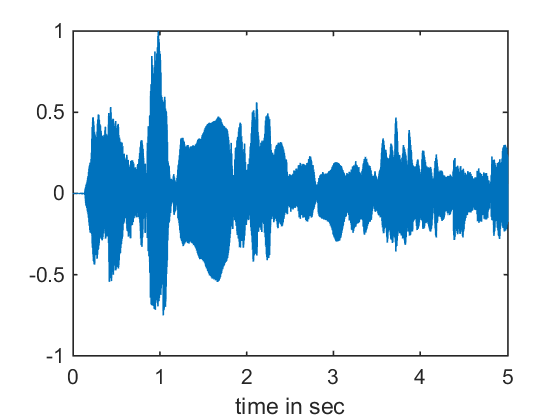

In [23]:
%plot -s 560,420
% plot wave file
xn = (1:length(x))/Fs;
plot(xn,x), xlabel('time in sec')

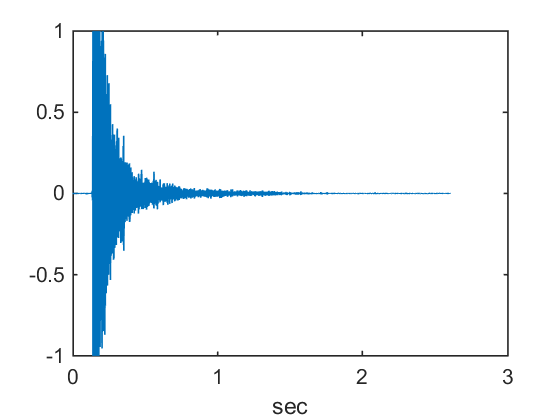

In [32]:
%% impulse response in a closed room (by gunshot)
[h, Fs] = audioread([pwd,'\image_files\180961__kleeb__gunshots.wav']);
h = h(:,1); % stereo to mono
sound(h, Fs)
plot((1:length(h))/Fs, h), xlabel('sec')

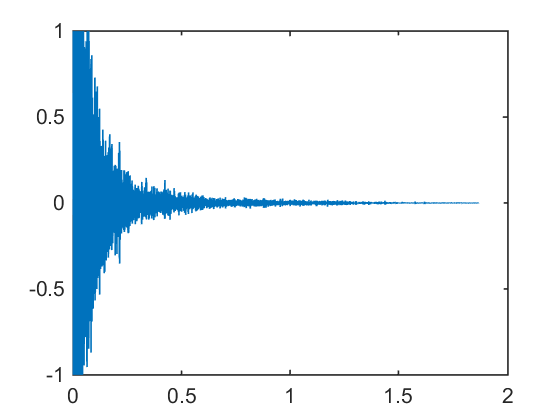

In [33]:
% need to pre-processing

h = h(6000:Fs*2);
h = h/max(h);
hn = (1:length(h))/Fs;

plot(hn,h), ylim([-1,1])
sound(h, Fs)

In [34]:
% image how the music played in a closed room sounds like

y = conv(x,h);
y = y/max(y);

sound(y, Fs)

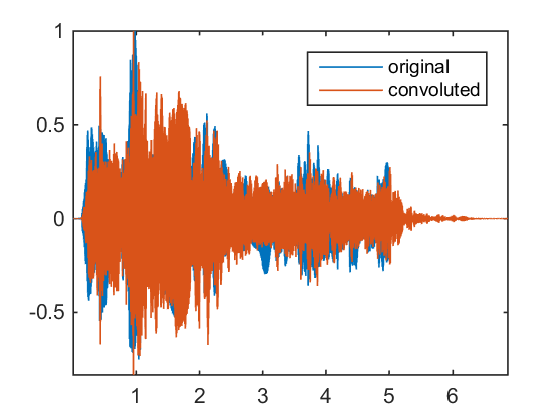

In [35]:
yn = (1:length(y))/Fs;
plot(xn,x,yn,y), axis tight
legend('original','convoluted')

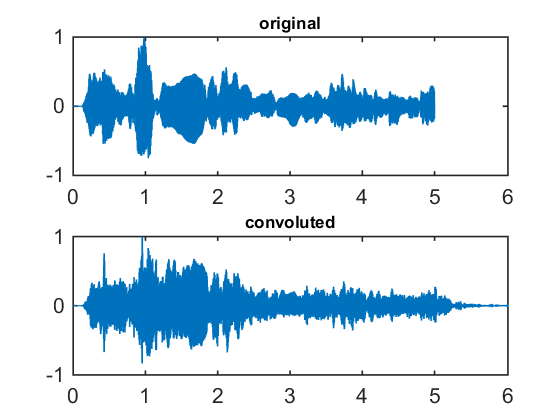

In [39]:
yn = (1:length(y))/Fs;
subplot(2,1,1), plot(xn,x), xlim([0 6]), title('original','fontsize',8)
subplot(2,1,2), plot(yn,y), xlim([0 6]), title('convoluted','fontsize',8)

## 2.2. Convolution example - image
- Computational photography at Gatech (https://www.youtube.com/watch?v=Sh2TrCYXdvo)

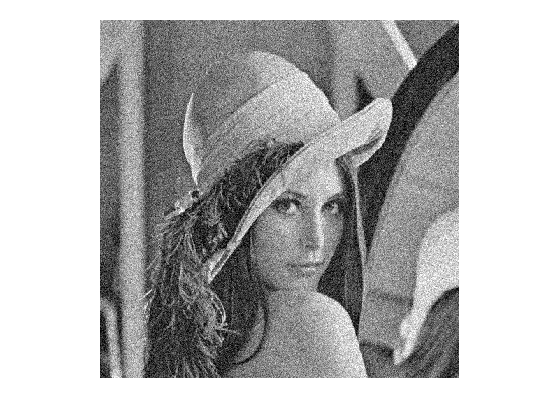

ans =

   512   512

In [40]:
im = imread([pwd,'\image_files\lena_sigma25.png']);
imshow(im) % noisy image
size(im)

In [41]:
M = ones(3,3)/9

M =

    0.1111    0.1111    0.1111
    0.1111    0.1111    0.1111
    0.1111    0.1111    0.1111

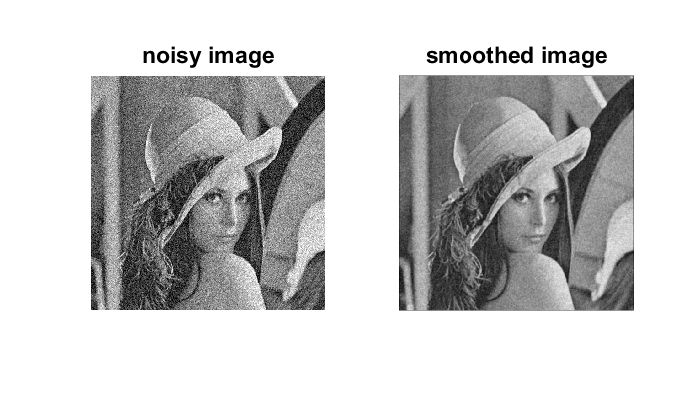

In [42]:
%plot -s 700,400
% smoothing or noise reduction
im_conv = conv2(M,double(im));

subplot(1,2,1), imshow(im), title('noisy image')
subplot(1,2,2), imshow(uint8(im_conv)), title('smoothed image')

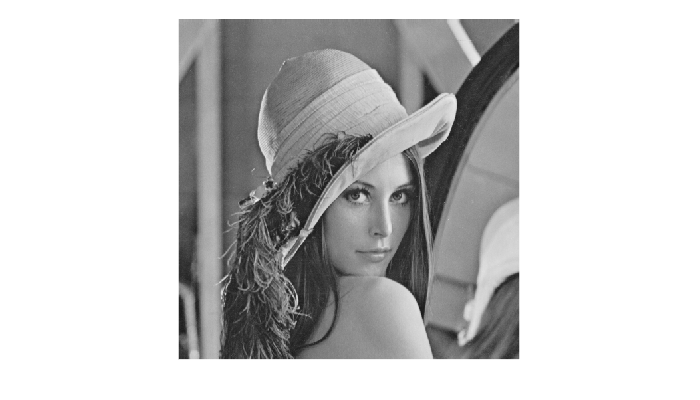

In [43]:
im = imread([pwd,'\image_files\lena.png']);
imshow(im) % original image

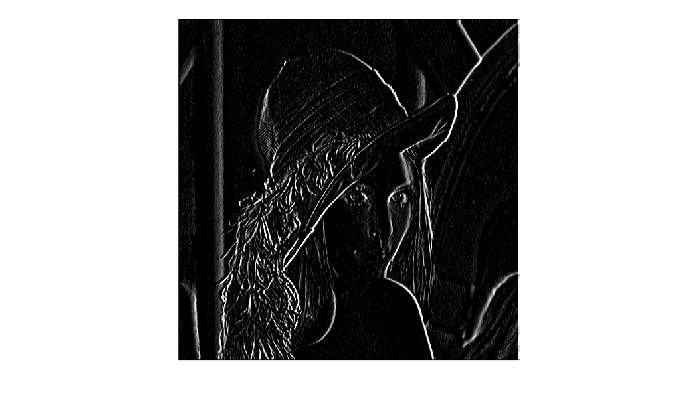

In [44]:
% guess what kind of image will be produced after convolution 
Mv  = [-1 0 1;
      -2 0 2;
      -1 0 1];

% edge detection
im_conv = conv2(Mv,double(im));
imshow(uint8(im_conv))

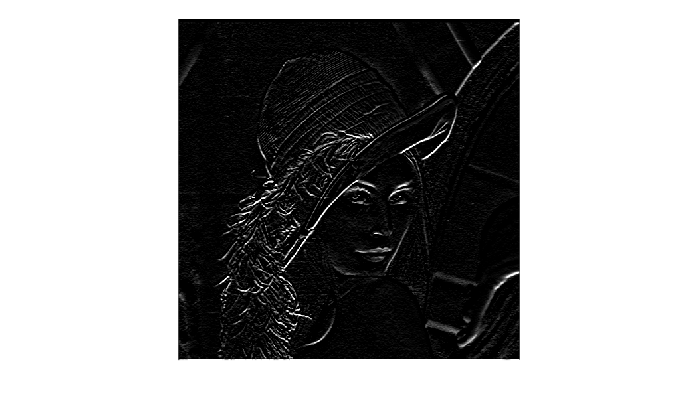

In [45]:
% guess what kind of image will be produced after convolution 
Mh  = [-1 -2 -1;
        0  0  0;
        1  2  1];

im_conv = conv2(Mh,double(im));
imshow(uint8(im_conv))

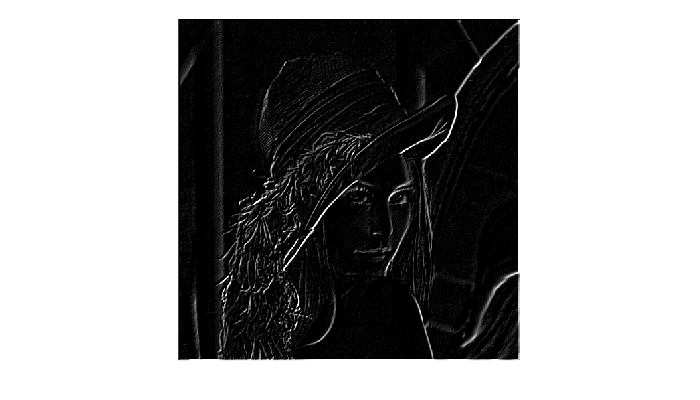

In [46]:
M = (Mv + Mh)/2;

im_conv = conv2(M,double(im));
imshow(uint8(im_conv))

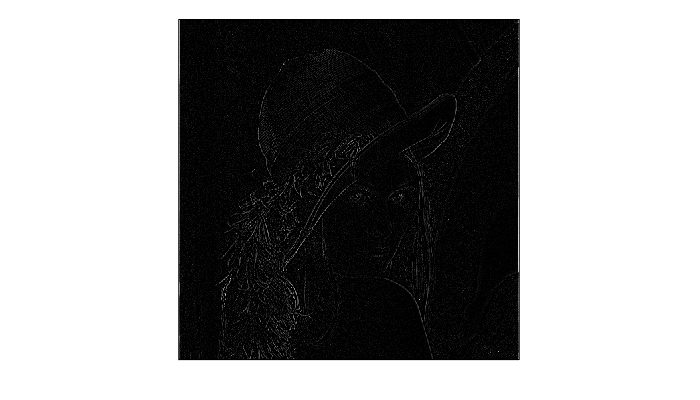

In [47]:
M = [ 0 -1  0;
     -1  4 -1;
      0 -1  0];
     
im_conv = conv2(M,double(im));
imshow(uint8(im_conv))

<img src = "./image_files/matrix_mul.png" style="border:1px solid black", width = 800>

<img src = "./image_files/linear_comb.png" style="border:1px solid black", width = 800>

<img src = "./image_files/inner_prod.png" style="border:1px solid black", width = 800>

<img src="./image_files/Toeplitz.png" style="border:1px solid black", width = 800>

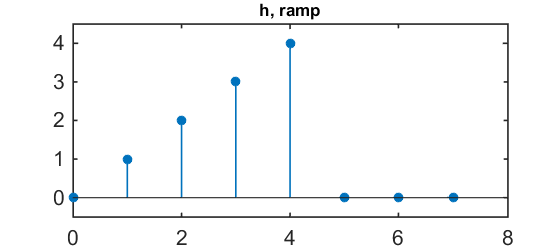

h, ramp

ans =

     0     1     2     3     4     0     0     0

In [49]:
%plot -s 560,250
N = 8;
n = 0:N-1;

% ramp
h = [0 1 2 3 4 0 0 0]';
disp('h, ramp')
h'

stem(n,h,'filled','markersize',4);
axis([0 N -0.5 4.5])
title('h, ramp','fontsize',8)

In [50]:
%plot -s 560,250
%% Create a circulent matrix H based on h

N = 8;
n = 0:N-1;

% ramp
h = [0 1 2 3 4 0 0 0]';
disp('h, ramp')
h'

H = zeros(N,N);
for i = 1:N
    H(:,i) = cirshftt(h,i-1,8);
end
H

h, ramp

ans =

     0     1     2     3     4     0     0     0


H =

     0     0     0     0     4     3     2     1
     1     0     0     0     0     4     3     2
     2     1     0     0     0     0     4     3
     3     2     1     0     0     0     0     4
     4     3     2     1     0     0     0     0
     0     4     3     2     1     0     0     0
     0     0     4     3     2     1     0     0
     0     0     0     4     3     2     1     0

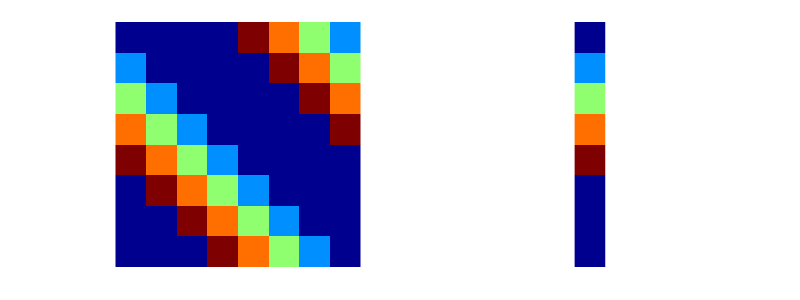

In [51]:
%plot -s 800,300
subplot(1,2,1), imagesc(H); colormap('jet'); axis('square'); axis off
subplot(1,2,2), imagesc(h); colormap('jet'); axis equal; axis off

## 2.3. Convolution demo with a discrete-time signal

- at Rice University
- by Richard Baraniuk
- from https://www.youtube.com/watch?v=0TP97T2spDc&index=10&list=PLBD_gON7g_m2jozqQSteL73MTAhLIllQ6

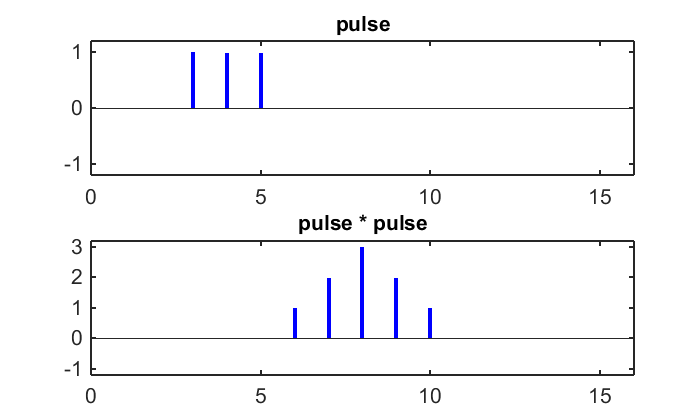

pulse

ans =

     0     0     0     1     1     1     0     0     0

convo of pulse with itself

ans =

     0     0     0     0     0     0     1     2     3     2     1     0     0     0     0     0     0

length of x

ans =

     9

length of y

ans =

    17

In [25]:
%plot -s 700,420

% Convolution_MatlabDEMO.m
% Matlab DEMOS for the lecture "ConvolutionExamples"
% richb, February 2014

%---EXAMPLE 1
%---Convolve a rectangular pulse with itself

% pulse
x = [0 0 0 1 1 1 0 0 0]';
disp('pulse')
x'

% convolve pulse with itself
y = conv(x,x);
disp('convo of pulse with itself')
y'

% note the lengths of x and y
disp('length of x'); length(x)
disp('length of y'); length(y)

% zero pad x to make the pulse the same length as y for more clear plotting
x(length(y)) = 0;
n = 0:length(y)-1;

subplot(211)
stem(n,x,'b','Marker','none','LineWidth',2); axis([0 16 -1.2 1.2]);
title('pulse','fontsize',10)

subplot(212)
stem(n,y,'b','Marker','none','LineWidth',2); axis([0 16 -1.2 3.2]);
title('pulse * pulse','fontsize',10)

## 2.3. Denoising a piecewise smooth signal
- from https://www.youtube.com/watch?v=0TP97T2spDc&index=10&list=PLBD_gON7g_m2jozqQSteL73MTAhLIllQ6

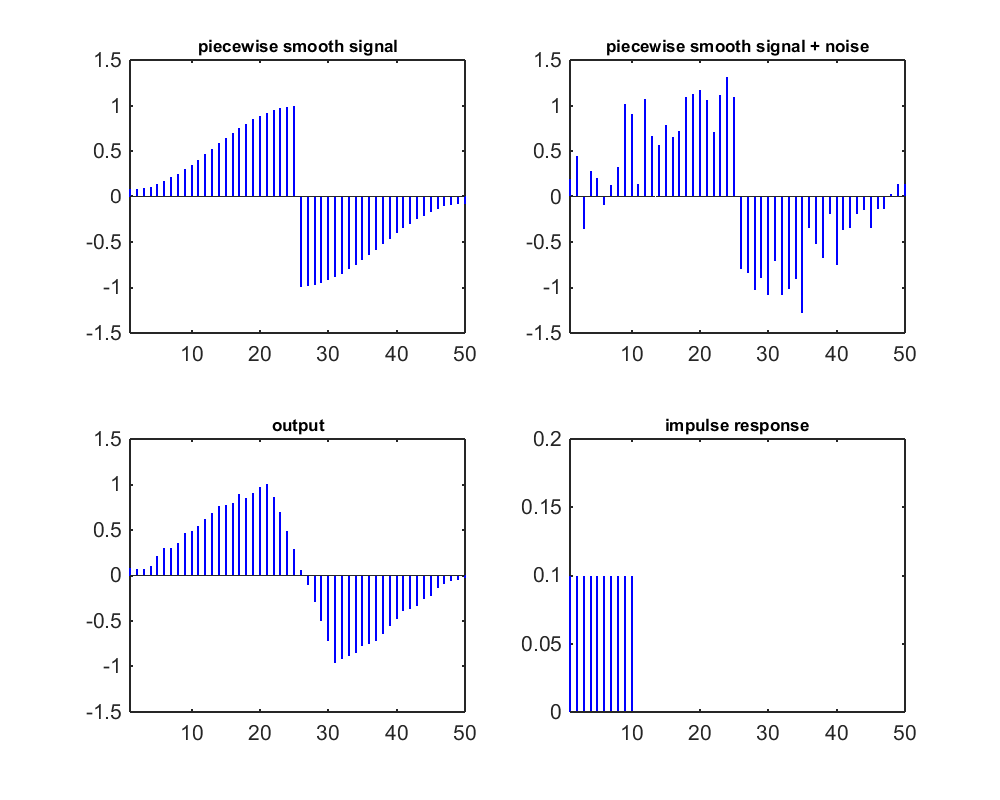

In [26]:
%plot -s 1000,800

%---EXAMPLE 2
%---Denoising a piecewise smooth signal
figure('units','normalized','position',[0 0 1 1.5]);

% piecewise smooth signal
N = 50;
n = 0:N-1;
s = hamming(N) .* [ones(N/2,1); -ones(N/2,1)];

subplot(221)
stem(s,'b','Marker','none','LineWidth',1);
axis([1 N -1.5 1.5])
title('piecewise smooth signal','fontsize',8)

% add noise to the signal
x = s + 0.2*randn(N,1);

subplot(222)
stem(x,'b','Marker','none','LineWidth',1);
axis([1 N -1.5 1.5])
title('piecewise smooth signal + noise','fontsize',8)

% construct moving average filter impulse response of length M
M = 10;
%M = 3;
h = ones(M,1)/M;

h1 = h; h1(N) = 0;
subplot(224)
stem(h1,'b','Marker','none','LineWidth',1);
axis([1 N 0 0.2])
title('impulse response','fontsize',8)

% convolve noisy signal with impulse response
y = conv(x,h);

subplot(223)
stem(y(M/2:N+M/2-1),'b','Marker','none','LineWidth',1);
axis([1 N -1.5 1.5])
title('output','fontsize',8)

## 2.5. Edge detection
- from https://www.youtube.com/watch?v=0TP97T2spDc&index=10&list=PLBD_gON7g_m2jozqQSteL73MTAhLIllQ6

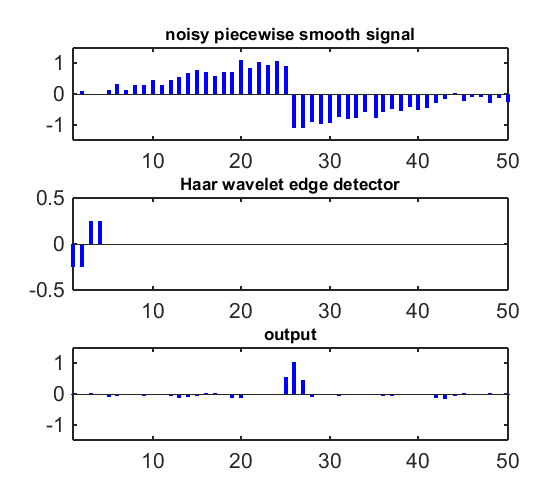

In [27]:
%plot -s 560,500

%---EXAMPLE 3
%---Edge detection
figure('units','normalized','position',[0 0 1 1.5]);

% piecewise smooth signal with a bit of noise added
N = 50;
n = 0:N-1;
s = hamming(N) .* [ones(N/2,1); -ones(N/2,1)];
x = s + 0.1*randn(N,1);

subplot(311)
stem(x,'b','Marker','none','LineWidth',2);
axis([1 N -1.5 1.5])
title('noisy piecewise smooth signal','fontsize',8)

% haar wavelet edge detector
w = (1/4)*[-ones(2,1); ones(2,1)];
M = length(w);

w1 = w; w1(N)=0;
subplot(312)
stem(w1,'b','Marker','none','LineWidth',2);
axis([1 N -0.5 0.5])
title('Haar wavelet edge detector','fontsize',8)

% convolve noisy signal with impulse response
y = conv(x,w);

subplot(313)
stem(y(M/2:N+M/2-1),'b','Marker','none','LineWidth',2);
axis([1 N -1.5 1.5])
title('output','fontsize',8)

## 2.6. Circular convolution of ramp and sinusoid
- from https://www.youtube.com/watch?v=0TP97T2spDc&index=10&list=PLBD_gON7g_m2jozqQSteL73MTAhLIllQ6

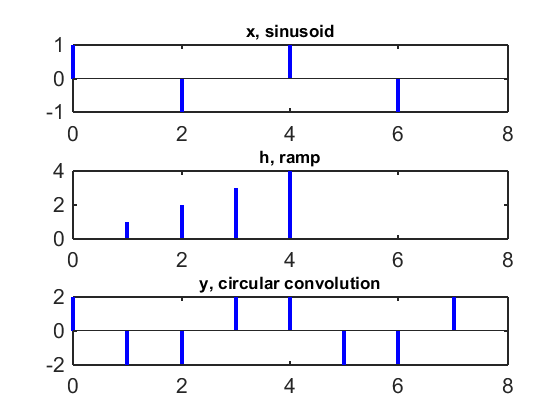

x, sinusoid

ans =

     1     0    -1     0     1     0    -1     0

h, ramp

ans =

     0     1     2     3     4     0     0     0

In [28]:
%plot -s 560,420

%---EXAMPLE 4
%---Circular convolution of ramp and sinusoid
figure('units','normalized','position',[0 0 1 1.5]);

N = 8;
n = 0:N-1;

% sinusoid
x = [1 0 -1 0 1 0 -1 0]';
disp('x, sinusoid')
x'

subplot(311)
stem(n,x,'b','Marker','none','LineWidth',2);
%axis([1 N -1.5 1.5])
title('x, sinusoid','fontsize',8)

% ramp
h = [0 1 2 3 4 0 0 0]';
disp('h, ramp')
h'

subplot(312)
stem(n,h,'b','Marker','none','LineWidth',2);
%axis([1 N -1.5 1.5])
title('h, ramp','fontsize',8)

% circularly convolve 
y = cconv(x,h,N);

subplot(313)
stem(n,y,'b','Marker','none','LineWidth',2);
%axis([1 N -1.5 1.5])
title('y, circular convolution','fontsize',8)

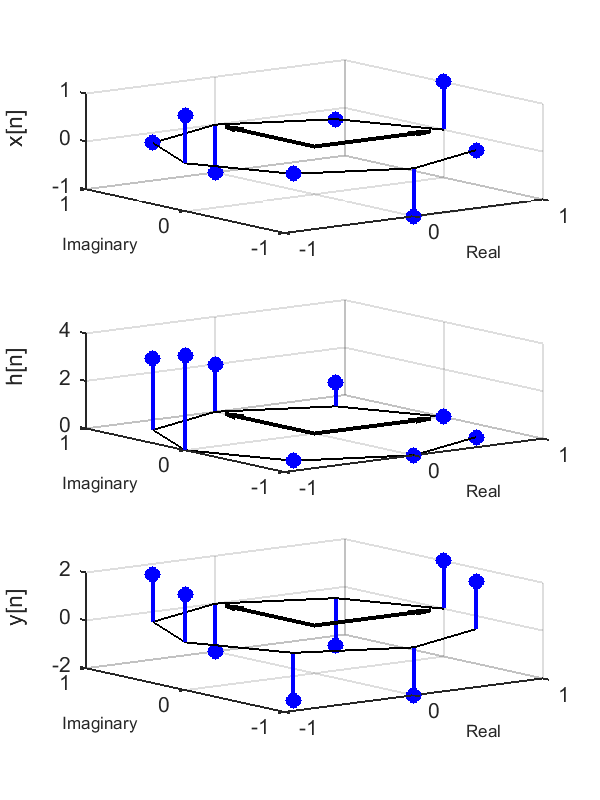

In [29]:
%plot -s 600,800

% periodic discrete-time signal - circular representation

theta2 = (0:1/N:1)*2*pi;
theta = theta2(1:end-1);

re = cos(theta);
im = sin(theta);

figure(2),  clf

subplot(3,1,1),  stem3(re,im,x,'filled','b','linewidth',2);   hold on;
plot(re,im,'k')
quiver(0,0,1,0,'k','linewidth',2,'maxheadsize',0.5)
quiver(0,0,0,1,'k','linewidth',2,'maxheadsize',0.5), hold off
xlabel('Real','fontsize',8), ylabel('Imaginary','fontsize',8), zlabel('x[n]')

subplot(3,1,2),  stem3(re,im,h,'filled','b','linewidth',2);   hold on;
plot(re,im,'k')
quiver(0,0,1,0,'k','linewidth',2,'maxheadsize',0.5)
quiver(0,0,0,1,'k','linewidth',2,'maxheadsize',0.5), hold off
xlabel('Real','fontsize',8), ylabel('Imaginary','fontsize',8), zlabel('h[n]')


subplot(3,1,3),  stem3(re,im,y,'filled','b','linewidth',2);   hold on;
plot(re,im,'k')
quiver(0,0,1,0,'k','linewidth',2,'maxheadsize',0.5)
quiver(0,0,0,1,'k','linewidth',2,'maxheadsize',0.5), hold off
xlabel('Real','fontsize',8), ylabel('Imaginary','fontsize',8), zlabel('y[n]')

## 2.7. Verify by mulitplication with circulent matrix

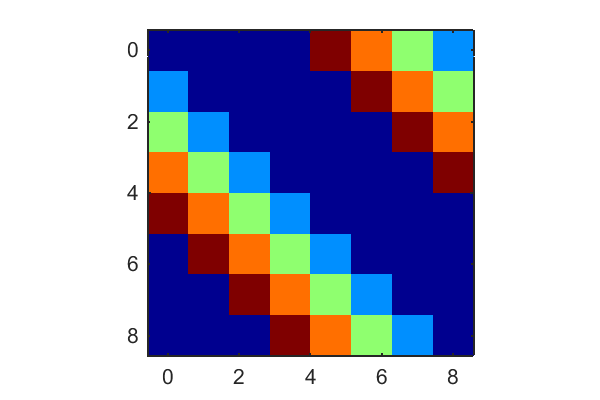

H =

     0     0     0     0     4     3     2     1
     1     0     0     0     0     4     3     2
     2     1     0     0     0     0     4     3
     3     2     1     0     0     0     0     4
     4     3     2     1     0     0     0     0
     0     4     3     2     1     0     0     0
     0     0     4     3     2     1     0     0
     0     0     0     4     3     2     1     0

output computed by circulent matrix multiplication

ans =

     2    -2    -2     2     2    -2    -2     2

output computed by circular convolution

ans =

     2    -2    -2     2     2    -2    -2     2

In [30]:
%plot -s 600,400
% verify by mulitplication with circulent matrix
figure('units','normalized','position',[0 0 1 1.5]);

%%%%% Create a circulent matrix H based on h %%%%%
d = 1;
N = numel(h) ; 
idx = -d * ones(N) ;       % takes care of forward or backward shifts
    idx(:,1) = 1:N ;           % creating the shift ..
    idx = cumsum(idx,2) ;      % .. by applying cumsum
    idx = rem(idx+N-1, N)+1 ;  % all idx become positive by adding N first
    
    if d==1 & size(h,1)==1,    
        % needed for row vectors with forward shift (bug fixed in v2.0)
        idx = idx.' ;
    end
    H = h(idx)
%%%%% END circulent matrix creation

nn = 0:8;
imagesc(nn,nn,H); colormap('jet'); axis('square');

yM = H * x;

disp('output computed by circulent matrix multiplication')
yM'

disp('output computed by circular convolution')
y'

## 2.8. Infinite-length convolution via circular convolution
- from https://www.youtube.com/watch?v=0TP97T2spDc&index=10&list=PLBD_gON7g_m2jozqQSteL73MTAhLIllQ6

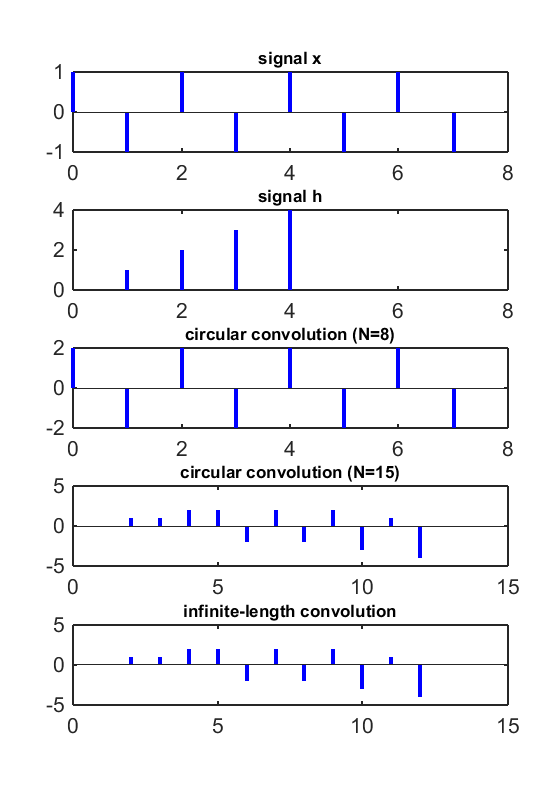

x and x zero padded

ans =

     1    -1     1    -1     1    -1     1    -1


ans =

     1    -1     1    -1     1    -1     1    -1     0     0     0     0     0     0     0

h and h zero padded

ans =

     0     1     2     3     4     0     0     0


ans =

     0     1     2     3     4     0     0     0     0     0     0     0     0     0     0

In [31]:
%plot -s 560,800

%---EXAMPLE 5
%---Infinite-length convolution via circular convolution
figure('units','normalized','position',[0 0 1 1.5]);

N = 8;
n = 0:N-1;

% sinusoid
x = [1 -1 1 -1 1 -1 1 -1]';

subplot(511)
stem(n,x,'b','Marker','none','LineWidth',2);
%axis([1 N -1.5 1.5])
title('signal x','fontsize',8)

% ramp
h = [0 1 2 3 4 0 0 0 ]';

subplot(512)
stem(n,h,'b','Marker','none','LineWidth',2);
%axis([1 N -1.5 1.5])
title('signal h','fontsize',8)

% circular convolution of length N=8 
yC8 = cconv(x,h,8);

subplot(513)
stem(n,yC8,'b','Marker','none','LineWidth',2);
%axis([1 N -1.5 1.5])
title('circular convolution (N=8)','fontsize',8)

% circular convolution of length N=8+8-1=15
xz = x; xz(15) = 0;
hz = h; hz(15) = 0;
disp('x and x zero padded')
x' 
xz'
disp('h and h zero padded')
h'
hz'

yC17 = cconv(xz,hz,15);

subplot(514)
stem(yC17,'b','Marker','none','LineWidth',2);
%axis([1 N -1.5 1.5])
title('circular convolution (N=15)','fontsize',8)

% infinite convolution (implicitly zero padded) 
yI = conv(x,h);

subplot(515)
stem(yI,'b','Marker','none','LineWidth',2);
%axis([1 N -1.5 1.5])
title('infinite-length convolution','fontsize',8)

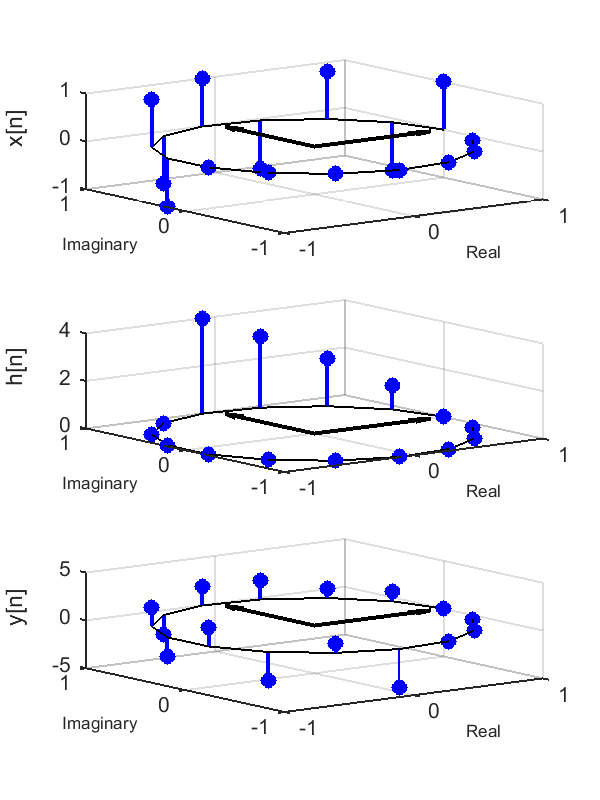

In [32]:
%plot -s 600,800

% periodic discrete-time signal - circular representation

N = 15;
theta2 = (0:1/N:1)*2*pi;
theta = theta2(1:end-1);

re = cos(theta);
im = sin(theta);

figure(2),  clf

subplot(3,1,1),  stem3(re,im,xz,'filled','b','linewidth',2);   hold on;
plot(re,im,'k')
quiver(0,0,1,0,'k','linewidth',2,'maxheadsize',0.5)
quiver(0,0,0,1,'k','linewidth',2,'maxheadsize',0.5), hold off
xlabel('Real','fontsize',8), ylabel('Imaginary','fontsize',8), zlabel('x[n]')

subplot(3,1,2),  stem3(re,im,hz,'filled','b','linewidth',2);   hold on;
plot(re,im,'k')
quiver(0,0,1,0,'k','linewidth',2,'maxheadsize',0.5)
quiver(0,0,0,1,'k','linewidth',2,'maxheadsize',0.5), hold off
xlabel('Real','fontsize',8), ylabel('Imaginary','fontsize',8), zlabel('h[n]')


subplot(3,1,3),  stem3(re,im,yI,'filled','b','linewidth',2);   hold on;
plot(re,im,'k')
quiver(0,0,1,0,'k','linewidth',2,'maxheadsize',0.5)
quiver(0,0,0,1,'k','linewidth',2,'maxheadsize',0.5), hold off
xlabel('Real','fontsize',8), ylabel('Imaginary','fontsize',8), zlabel('y[n]')

---
# 3. _Non-linear_ System: Median Filter

$$\large y[n] = \text{median}\{x[n-k],\cdots,x[n+k]\}$$

There are nonlinear neighborhood operations that can be perfromed for the purpose of noise reduction that can do a better job of preserving edges than simple smoothing filters.

Median filters can do an excellent job of rejecting certain types of noise, in particular, "shot" or impulse noise (outlier in a time series) in which some individual pixels or signals have extreme values.

## 3.1. Removing shot noise (salt & pepper noise) in image

- Image and video processing at Duke (https://www.youtube.com/watch?v=xFaddafLbcg)

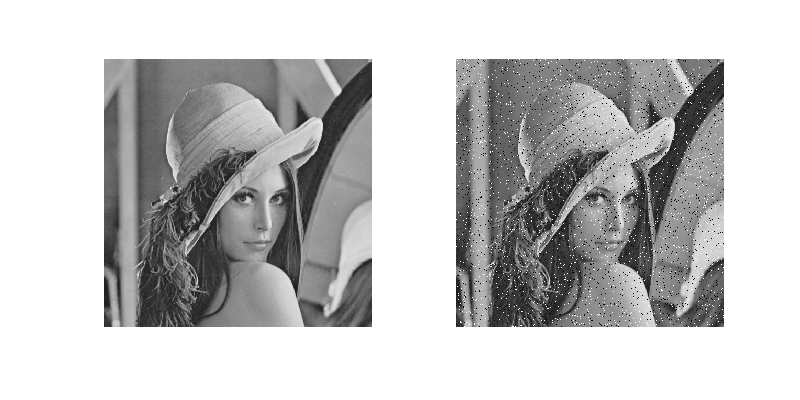

In [33]:
%plot -s 800,400
im = imread('conv_example/lena.png');
im_shot = imnoise(im,'salt & pepper',0.05);
subplot(1,2,1), imshow(im) % original image
subplot(1,2,2), imshow(im_shot)

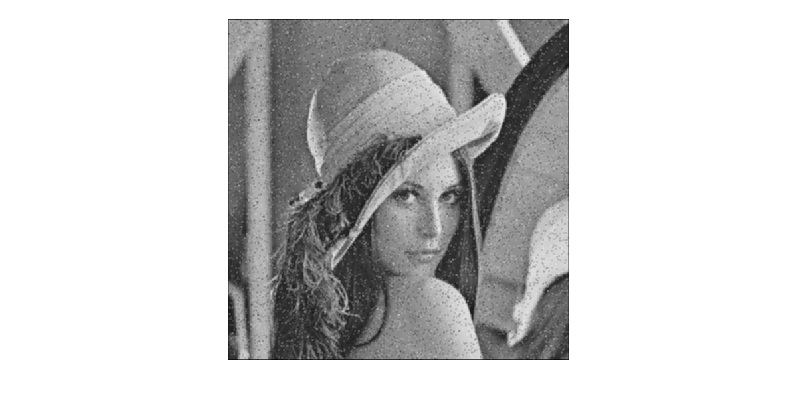

In [34]:
M = ones(3,3)/9;
im_avg = conv2(M,double(im_shot));
imshow(uint8(im_avg))

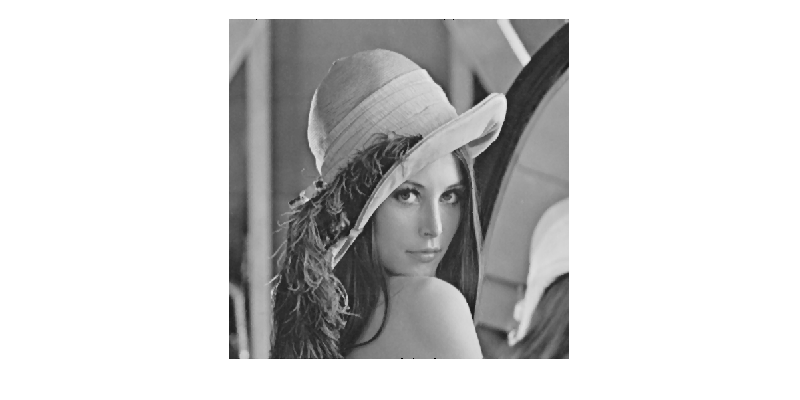

In [35]:
% help medfilt1
% help medfilt2

im_median = medfilt2(double(im_shot),[3,3]);
imshow(uint8(im_median))

## 3.2. Removing shot noise in audio

- Electrial Engineering 123 at Berkeley (https://www.youtube.com/watch?v=YkDsqLUqJJ4&list=PL-XXv-cvA_iCUQkarn2fxB3NggnPF_dob&index=2)

In [53]:
[x, Fs] = audioread([pwd,'\image_files\92002_jcveliz_violin-origional.wav']);

x = x/max(x); % normalize
sound(x, Fs)  % play a wave file with sampling rate Fs

In [54]:
% generate an audio signal with a salt and pepper noise
shot_noise = imnoise(zeros(length(x),1),'salt & pepper',0.05);
x_noise = x + shot_noise - mean(shot_noise);
sound(x_noise,Fs)

In [55]:
% apply a linear low-pass filter
h = [1,1,1]/3;
x_avg = conv(h,x_noise);
sound(x_avg,Fs)

% does not work very well

In [56]:
% apply a nonlinear filter
x_median = medfilt1(x_noise,5);
sound(x_median,Fs)

% WOW !!!

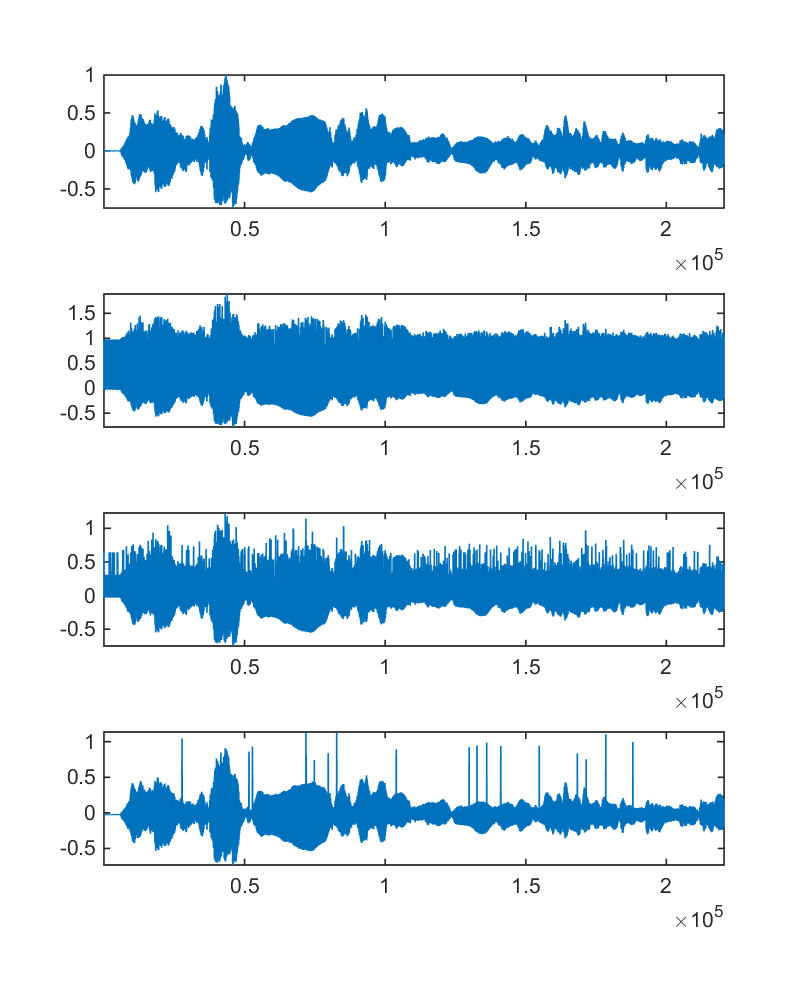

In [57]:
%plot -s 800,1000

subplot(4,1,1), plot(x); axis tight
subplot(4,1,2), plot(x_noise); axis tight
subplot(4,1,3), plot(x_avg); axis tight
subplot(4,1,4), plot(x_median); axis tight

In [58]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>